<a href="https://colab.research.google.com/github/sdominguez/aniei2023-tallerAD/blob/main/Caso2_PrediccionFallos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

##Cargar Datos

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/sdominguez/Datasets/master/Predicci%C3%B3nFallos/Failure%20prediction.csv',header=0, delimiter=';')

In [4]:
X = df.iloc[:, 0:3].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

##Entrenar con Regresion Logística

In [5]:
rlog = LogisticRegression(solver='liblinear', random_state=0)
rlog.fit(X_train,y_train)

LogisticRegression(random_state=0, solver='liblinear')

##Entrenar con Árbol de decisión - clasificación

In [11]:
#dtr = DecisionTreeClassifier()
dtr = DecisionTreeClassifier(criterion="entropy", max_depth=5)
dtr.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

##Prediccion

In [12]:
pred_rlog = rlog.predict(X_test)
pred_dtr = dtr.predict(X_test)

##Evaluar

In [13]:
print('--Evaluacion con Regresión Logística--')
print(classification_report(y_test, pred_rlog))
print('\n--Evaluacion con Árbol de decisión--')
print(classification_report(y_test, pred_dtr))

--Evaluacion con Regresión Logística--
              precision    recall  f1-score   support

          No       0.86      0.78      0.82       123
         Yes       0.72      0.82      0.77        87

    accuracy                           0.80       210
   macro avg       0.79      0.80      0.79       210
weighted avg       0.80      0.80      0.80       210


--Evaluacion con Árbol de decisión--
              precision    recall  f1-score   support

          No       1.00      0.74      0.85       123
         Yes       0.73      1.00      0.84        87

    accuracy                           0.85       210
   macro avg       0.87      0.87      0.85       210
weighted avg       0.89      0.85      0.85       210



In [14]:
cm_rlog = confusion_matrix(y_test, rlog.predict(X_test))
cm_dtr = confusion_matrix(y_test, dtr.predict(X_test))

print('--Matriz de confusión de la regresion logística--')
print(cm_rlog)
print('\n--Matriz de confusión del árbol de decisión--')
print(cm_dtr)

--Matriz de confusión de la regresion logística--
[[96 27]
 [16 71]]

--Matriz de confusión del árbol de decisión--
[[91 32]
 [ 0 87]]


[Text(0.45454545454545453, 0.9166666666666666, 'x[2] <= 59.5\nentropy = 0.965\nsamples = 490\nvalue = [299, 191]'),
 Text(0.36363636363636365, 0.75, 'entropy = 0.0\nsamples = 240\nvalue = [240, 0]'),
 Text(0.5454545454545454, 0.75, 'x[2] <= 78.5\nentropy = 0.788\nsamples = 250\nvalue = [59, 191]'),
 Text(0.36363636363636365, 0.5833333333333334, 'x[2] <= 75.0\nentropy = 0.964\nsamples = 113\nvalue = [44, 69]'),
 Text(0.2727272727272727, 0.4166666666666667, 'x[0] <= 0.928\nentropy = 0.933\nsamples = 106\nvalue = [37, 69]'),
 Text(0.18181818181818182, 0.25, 'x[2] <= 60.5\nentropy = 0.962\nsamples = 96\nvalue = [37, 59]'),
 Text(0.09090909090909091, 0.08333333333333333, 'entropy = 0.575\nsamples = 22\nvalue = [3, 19]'),
 Text(0.2727272727272727, 0.08333333333333333, 'entropy = 0.995\nsamples = 74\nvalue = [34, 40]'),
 Text(0.36363636363636365, 0.25, 'entropy = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.45454545454545453, 0.4166666666666667, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0]'),

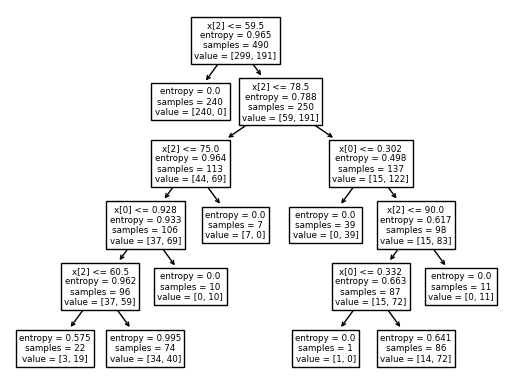

In [15]:
plot_tree(dtr)